<a href="https://colab.research.google.com/github/chaosagent86/machine_learning/blob/main/Abschlussprojekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abschlussprojekt
**Bearbeitende:**
*   Baier, Sebastian
*   Figlmüller, Magdalena

## Allgemeine Angaben

**Vorgabe:**
```
The goal: Use a group-dependent subset of the well known mnist data-set
to train and compare two models which do a binary classification.

To get the group-specific data set you need two numbers
1. the group number, which is the 6 digit number obtained by concatenating
the last three digits of the group members student IDs and use
this group number.
2. the group digit which is the third digit of your group number.
```

**Daraus ergeben sich folgende Angaben:**

*   Baier: 2310542002 --> 002
*   Figlmüller: 2310542017 --> 017

**Gruppennummer:** 002017  
**Gruppenziffer:** 2

# Aufgabe 1.1

```
1. Work through the provided code and explain the model. In particular
explain what the SGD-Classifier does/ how it works? If helpful, extend
the code to clarify what is the concept of the model, what it predicts,
etc. Finally explain the model evaluation.
```

# SGD Classifier

Der SGD Classifier verwendet den sogenannten **S**tochastic **G**radient **D**escent (SGD) Algorithmus. Es handelt sich dabei um einen recht einfachen aber dafür sehr effizienten Ansatz um Daten zu klassifizieren. Insbesondere, wenn es sich um große Datensätze handelt (bspw. Text Klassifizierung oder auch die Prozessierung natürlicher Sprache) und bei dem die Daten inkrementell verarbeitet werden (können).

Bei **Gradient Descent* handelt es sich um ein Optimierungsverfahren, das die Parameter des Modells nach und nach optimiert. Dabei kann es sich beispielsweise um die Parameter einer linearen Regression handeln. Das passiert dahingehend, als dass die sogenannte Loss-Funktion versucht wird zu minimieren. Diese misst, wie gut das Modell die Trainingsdaten vorhersagt.

Normalerweise wird bei einem traditionellen Gradient Descent der entsprechende Gradient über den kompletten Datensatz berechnet. Durch den Zusatz **Stochastic** werden die Trainingsparameter nach jeder einzelnen Trainingsbeobachtung bzw. Mini-Batches aktualisiert. In der Folge werden häufiger Updates durchgeführt, was anscheinend insbesondere bei großen Datensätzen effizienter sein kann.

Der SGD Classifier verwendet üblicherweise entweder eine logistische Regression oder Support Vector Machines um Modelle zu trainieren.

Basierend auf dieser Seite
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

und dem folgenden Code-Abschnitt
```
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_2)
```
greifen die Standardparameter. In dem uns bereitgestellten Code wäre das loss="hinge", wobei hinge für eine lineare Support Vector Machine (SVM) steht. Dementsprechend wurden eine SVM in unserem SGD Classifier für das Training der Daten verwendet.

Im Allgemeinen erfolgen folgende Schritte um die Daten zu trainieren:
1) Die Trainingsdaten und Testdaten werden erzeugt bzw. entsprechend aufgesplittet
2) Die Modellparameter werden initialisiert
3) Der Algorithmus durchläuft die Trainingsdaten mehrmals, wobei dieser in jeder Iteration die Gradienten der Verlustfunktion bezüglich der Modellparameter berechnet.
4) Nach jeder einzelnen Trainingsbeobachtung werden die Modellparameter optimiert bzw. aktualisiert.
5) Das ganze läuft so lange, bis entweder das Maximum an Iterationen erreicht ist oder die Verlustfunktion einen festgelegten Schwellenwert unterschreitet.

Zur Evaluierung des Modells stehen bspw. die Confusion Matrix oder der Accuracy Score zur Verfügung. Ersterer hilft dabei zu verstehen, wie gut die Klassifizierung im Allgemeinen funktioniert hat und wäre vermutlich auch insbesondere hilfreich, wenn man mehrere Klassen parallel trainiert um zu sehen wo die größten Probleme bestehen (=häufig falsch klassifiziert wird) und welche Klassen besonders gut klassifiziert werden (=sehr hohe Anzahl an True Positives).

Der Accuracy Score zeigt einfach nur die Anzahl der korrekt vorhergesagten Beobachtungen an und ist ein schneller Indikator dafür wie gut das Modell funktioniert.

Zusätzlich besteht die Möglichkeit einen sogenannten Classification Report zu erstellen. Dieser gibt Aufschluss über die Genauigkeit und Robustheit des Modells in dem es genaue Informationen darüber gibt, wie die Daten verteilt sind, wie gut die Vorhersage für "False" und für "True" funktioniert, wie viele Instanzen überhaupt relevant waren für das Training etc.


## Setup des Python-Projektes

Der unten stehende Code (im Original aus einem Code Block bestehend) ist erstmal nur dazu da, notwendige Packages zu laden. Relevant für uns ist insbesondere das Paket *sklearn*, da es für das machinelle Lernen von Relevanz ist.
Andere Pakete sind bspw. *sys*, *numpy* und *os* sowie *matplotlib*.

*   **sys** --> dient der Konfiguration von Python selbst
*   **sklearn** --> ein mittlerweile 'deprecated' Paket zur Verwendung von Machine Learning Algorithmen (Vergleich: https://pypi.org/project/sklearn/); *Aktuell wäre hier scikit-learn*
*   **numpy** --> Relevant um mit Arrays innerhalb von Python zu arbeiten
*   **matplotlib** --> Package zur Erstellung statischer, animierter und interaktiver Visualisierungen in Python

Relevant ist an dieser Stelle ebenfalls, ob mit der korrekten Python Version (>= 3.5) gearbeitet wird, ob es sich um ein Google Colab oder ein Kaggle Dokument handelt sowie die Überprüfung der sklearn Version (>= 0.20).

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Im folgenden Code Abschnitt werden weitere Parameter festgelegt. Primär geht es hierbei um die Abmessungen der Bilder sowie der Schriftgrößen, der Festlegung diverser Verzeichnisse.
Schließlich wird noch eine Funktion definiert *save_fig* zum abspeichern von erstellten Grafiken.

In [ ]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## MNIST (Modified National Institute of Standards and Technology database)

Im folgenden wird der MNIST Datensatz von OpenML geladen (siehe https://www.openml.org/search?type=data&sort=runs&id=554&status=active) welcher laut dieser Seite 784 Features beinhaltet, 60.000 Beispiele sowie ein Testset von 10.0000 Datenpunkten. Die Funktion hierfür ist *fetch_openml()*.

Die Bilder sind 28x28 Pixel groß.

Mittels der Funktion np.random.choice wird anschließend ein Test-Datensatz festgelegt, welcher später in den Zeilen...

```
X = mnist.data[indices]
y = mnist.target[indices]
```

... tatsächlich als Datensatz auch geladen wird. Die Funktion *mnist.keys()* zeigt anschließend noch die Schlüssel des Datensatzes an. Dies kann sehr hilfreich sein um den Datensatz besser verstehen zu können.

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)

mnist

# Set the random seed
np.random.seed(2017) #002017 does not work!

# Get indices for random selection
indices = np.random.choice(mnist.data.shape[0], 10000, replace=False)

# Select subset using the indices
# mnist = mnist[indices]
X = mnist.data[indices]
y = mnist.target[indices]
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Die Folgenden zwei Codeblöcke (X.shape sowie y.shape) geben lediglich Werte aus. Dies kann kann verwendet werden um zu verstehen, ob der Datensatz korrekt geladen wurde. Die Feature-Anzahl passt mit den Recherchere-Werten zusammen und auch die Anzahl der Datensätze welche viar *np.random.choice()* geladen wurden, passt mit diesen Werten zusammen.

In [ ]:
X.shape

(10000, 784)

In [ ]:
y.shape

(10000,)

*%matplotlib inline* wird hier verwendet um sicherzugehen, dass die Diagramme innerhalb von Google Colab bzw spezifischer Jupyter Notebooks angezeigt werden könen. Etwas irritierend ist hier der nochmalige Import der matplotlib library, da wir das bereits am Anfang machten.

X ist hier ein Array. Demnach wird mit
```
some_digit = X[1]
```
auf das erste (nicht nullte) Element von X zugegriffen und in some_digit gespeichert. Anschließend erfolgt ein reskalieren auf 28x28 Pixel und dieses wird in some_digit_image abgespeichert. Mittels der Funktion plt.imshow erfolgt anschließed die Anzeige des Plots.

Die Funktion

```
plt.axis("off")
```

sorgt hierbei dafür, dass die Pixel nicht angezeigt werden als X- und Y-Skala. Codeblock dient hier lediglich zur Visualisierung um zu schauen ob die Daten auch wirklich vorhanden sind. Demnach ist es völlig egal, was in X bzw. some_digit eingelesen wird an dieser Stelle.




Saving figure some_digit_plot


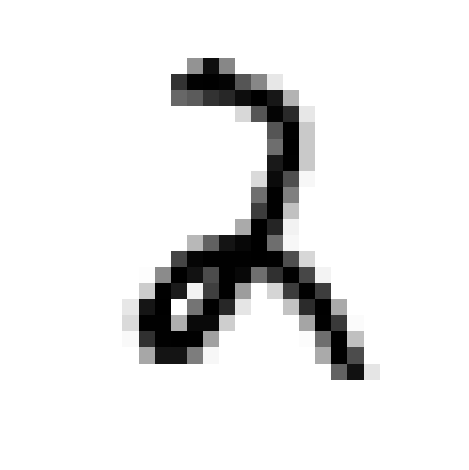

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[5]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In Y dagegen liegt nicht das Bild sondern dir korrekte Klassifizierung.

In [ ]:
y[2]

'0'

Hier wird y gecastetd in einen unsigned integer mit 8 Bit Länge.

In [ ]:
y = y.astype(np.uint8)

An dieser Stelle wird der Datensatz in einen Trainings- und Testdatensatz aufgeteilt. Dabei sollen die ersten 8.000 Datensätze für das Training verwendet werden und die restlichen 2.000 für das Testen. Es wird also 80/20 aufgeteilt.

In [ ]:
X_train, X_test, y_train, y_test = X[:8000], X[8000:], y[:8000], y[8000:]

## Training des binären Klassifikators

An dieser Stelle ist es jetzt wichtig, dass der Original-Code weiter bearbeitet wird. Im Original-Code steht hier folgendes:
```
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
```
Dies bedeutet, dass auf der rechten Seite *y_train == 5* die Zielziffer auf fünf gesetzt wird und diese für das Training herangezogen wird.

Laut Aufgabenstellung ist unsere Gruppenziffer allerdings die **zwei (2)**. Um theoretische bis hin zu potentiellen Missverständnissen hinsichtlich des Codes zu vermeiden wird nicht nur die Zuweisung sondern werden in Folge auch sämtliche Variablenbezeichnungen korrekt umbenannt.

In [ ]:
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [ ]:
y_train_2[y_train_2 == True]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Nun sind wir einen Schritt weiter. Vorhin haben wir unseren Trainings- und Testdatensatz erstellt. Nun laden wir den SGDClassifier aus dem Paket sklearn.linear_model.

Weiters erstellen wir ein Objekt sgd_clf der Klasse SGDClassifier und übergeben an diesen diverse Parameter, welche wie folgt zu interpretieren sind:


*   *max_iter=1000* --> gibt die maximale Anzahl an Iterationen an, welche der Algorithmus durchlaufen soll. In unserem Fall sind das 1000.
*   *tol_1e-3* --> legt die Toleranz für die Konvergenz fest. Wenn die Änderung der loss-Funktion (=Verlustfunktion) zwischen den einzelnen Iterationen kleiner als der hier angegebene Wert ist, dann führt das zu einem Stopp des Trainings.
*   *random_state=42* --> ähnlich seed(). Dient dazu, die Ergebnisse reproduzierbar zu machen.

Anschließend erfolgt das eigentliche Training über die Funktion *sgd_clf.fit*. Hier erhält der Classifier über X_train die Bilder und über y_train_2 die Klassifikation bzw. die entsprechenden Labels. Nach einiger Zeit sollte hier anschließend ein Modell erstellt sein, welches sich über die Iterationen immer weiter angepasst hat.

Gemäß folgender Quelle: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
handelt es sich beim 'stochastic gradient descent' (SGD) Classifier um einen linearen Classifier, welcher "regularized linear models" verwendet. Nach unserem Verständnis handelt es sich hierbei um eine Implementierung von sogenannten Elastic nets (sprich einer recht dynamischen Implementierung von LASSO und Ridge-Algorithmen). Diese finden Verwendung um die Feature-Anzahl bzw. Anzahl an Dimensionen zu reduzieren und damit das Modell etwas weniger komplex werden zu lassen, was in Folge wiederrum hilft um die Wahrscheinlichkeit für ein sogenanntes Overfitting des Modells zu verringern oder idealerweise ganz vermeiden zu können. LASSO lässt hierbei Features völlig entfallen (Beta = Null) während Beta bei Ridge nur gegen Null tendiert aber niemals null wird.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_2)

SGDClassifier(random_state=42)

Wir haben oben die Variable *some_digit* initialisiert. Hier wird der Classifier dafür verwendet um zu schauen, ob ein Bild, welches in *some_digit* hinterlegt ist der Ziffer entspricht für welches wir das Modell erstellt haben. In unserem Fall sollte bei der Ziffer 2 idealerweise immer ein True erscheinen und andernfalls ein False.

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

Hier wird das Modul *cross_val_score* aus *sklearn.model_selection* geladen. Eine Cross-Validation wird verwendet um herauszufinden wie gut bzw. genau das Modell arbeitet. Hier wird eine dreifache Cross-Validation durchgeführt - erkennbar an dem Parameter *cv=3*. Hierbei wird der Datensatz in drei Teile aufgeteilt - je zwei für das Training und einen für das Testen. Entsprechend erhalten wir auch drei Werte für die Accuracy, also die Aussage, wie genau das Modell gearbeitet hat bzw. wie viel Prozent der Ziffern korrekt klassifiziert wurden. Anzumerken ist hierbei, dass der default-Wert bei *cv=5* liegt, wir also in diesem Fall dafür sorgen, dass die Sets etwas größer sind.

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([0.96662917, 0.95388076, 0.96661665])

## Maßnahmen zur Leistungssteigerung

### Messung der Accuracy unter Verwendung der Cross-Validation

Auch hier werden wieder neue Module des Pakets sklearn nachgeladen.
Im Detail das Modul 'clone' aus sklearn.base sowie das Modul StatifiedKFold aus 'sklearn.model_selection'.
Gemäß folgender Webseite
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
handelt es sich hierbei um einen "Stratified K-Fold Cross-Validator".
Das Ziel laut https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold ist hierbei, die Test- und Trainingssets aufzuteilen. Und zwar nicht nur rein anhand der Sample-Größe sondern auch dahingehend, dass die Verteilung der Klassen gleichmäßig erfolgt. Es scheint sich hier um eine "etwas kontrollierter" Version eines "ziehen ohne zurücklegen" zu handeln im weitesten Sinne. Im Originaltext steht hier jedenfalls:

> "each set contains approximately the same percentage of samples of each target class as the complete set."

Die Variablen sind hierbei wie folgt zu interpretieren:
* n_splits=3 --> Anzahl der sogenannten Folds (n=3). Ein Fold ist hierbei "ein Teil", wobei - wie oben geschrieben - darauf geachtet wird, dass die Klassen gleichmäßig verteilt sind zwischen den Folds.
* shuffle=True --> Hier wird festgelegt, ob die Daten vor dem Aufteilen nochmal zufällig durchmischt werden. In unserem Fall ist das so (=True).
* random=42. Ähnlich dem "seed" - stellt sicher, dass die Ergebnisse reproduzierbar bleiben.

Anschließend erfolgt eine Iteration über die erstellten Folds, welche vorher in StratifiedKFold festgelegt wurden.
Clone() sorgt hierbei dafür, dass jeweils eine Kopie des SGDClassifiers erstellt wird. Dies stellt sicher, dass jedesmal mit einem frischen Modell trainiert wird bzw. im Umkehrschluss nicht ein einziges Modell immer stärker trainiert wird.

Es erfolgt anschließend eine Extraktion der Trainingsdaten sowie der dazugehörigen Labels. Via clone_clf.fit erfolgt ein Training des aktuellen Modells der jeweiligen Schleife und im Nachgang via clone_clf.predict erfolgt eine Vorhersage der Labels basierend auf dem aktuell trainierten Modell. Nun werden noch die korrekten Vorhersagen durchgezählt und anschließend über das print ausgegeben.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_2):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_2[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_2[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9670041244844394
0.9351331083614548
0.9624906226556639


**Note**: `shuffle=True` was omitted by mistake in previous releases of the book.

Es wird wieder etwas neues importiert: BaseEstimator aus dem Package sklearn.base.
Hier wird eine besondere Funktion innerhalb der Klasse 'Never2Classifier' erstellt: die Funktion fit() bekommt zwar die Bilddaten übergeben, allerdings nicht die dazu passenden Labels bzw. wird dieses immer als "None" gekennzeichnet. Hinzu kommt, dass diese Funktion schlicht nichts tut, bzw. keinen Inhalt aufweist: Das Schlüsselwort 'pass' dient hier als Platzhalter für Inhalt.

Gleiches gilt insbesondere auch für die FUnktion predict. Diese gibt immer den Wert 'False' zurück.

In [ ]:
from sklearn.base import BaseEstimator
class Never2Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Irritierend an dieser Stelle: die doch noch vergleichsweise hohe "Trefferquote".

In [ ]:
never_2_clf = Never2Classifier()
cross_val_score(never_2_clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([0.8983877 , 0.89613798, 0.89722431])

### Confusion Matrix

Hier werden mithilfe von Kreuzvalidierung Vorhersagen für jeden Datenpunkt generiert.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)

Hier wird eine Confusion-Matrix generiert.

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_2, y_train_pred)

array([[7039,  139],
       [ 162,  660]])

Confusion-Matrix unter der Annahme einer perfekten Vorhersage des richtigen Labels. Eine Confusion-Matrix stellt hier True-Positives, True-Negatives, False-Positives und False-Negatives gegenüber.

In [ ]:
y_train_perfect_predictions = y_train_2  # pretend we reached perfection
confusion_matrix(y_train_2, y_train_perfect_predictions)

array([[7178,    0],
       [   0,  822]])

### 'Precision' und 'Recall'

Hier werden die Precision und der Recall berechnet.
Die Precision oder deutsch Präzision zeigt an, wieviel Prozent der Daten korrekt vorhergesagt wurden und ist eine Art Qualitätsmerkmal. Der Recall ist eher eine Art Messung der Quantität.

An erster Stelle wurde hier die Präzision mithilfe einer bereitgestellten Funktion berechnet. Die dafür notwendige Formel ist TP/(TP+FP) bzw. True Positives / (True Positives + False Positives)

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_2, y_train_pred)

0.8260325406758448

In [ ]:
cm = confusion_matrix(y_train_2, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8260325406758448

Hier dagegen wurde der sogenannte Recall berechnet. Der Recall (=Trefferquote) ist die Fähigkeit des Klassifikators, alle positiven Proben zu finden.
Der beste Wert ist 1 und der schlechteste Wert ist 0.
Dieser wird berechnet über die Formel TP/(TP+FN) bzw. True Positives / (True Positives + False Negatives).

In [ ]:
recall_score(y_train_2, y_train_pred)

0.8029197080291971

In [ ]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.8029197080291971

Der hier berechnete F1-Score ist der harmonische Mittelwert aus der Präzision und der Trefferquote.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Berechnet wird dieser als 2xTP/(2xTP+FP+FN) bzw. 2x True Positives / (2x True Positives + False Positives + False Negatives).

Der beste Wert liegt hier bei 1 und der schlechteste bei 0. So gesehen ist das Modell zwar gut, aber noch sehr, sehr weit entfernt von einem "Perfekt".


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_2, y_train_pred)

0.8143121529919803

In [ ]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.8143121529919802

### Die Receiver-Operating-Characteristic (ROC) Kurve

Die Receiver-Operating-Characteristic Curve (kurz ROC Kurve) dient der Beurteilung der Qualität von Klassifizierungsmodellen. Hierbei können beispielswiese unterschiedliche Schwellenwerte und deren Auswirkung auf die Gesamtleistung verglichen werden - wobei hier konkret der Kompromiss zwischen der True Positive Rate (TPR) und der False Positive Rate (FPR) verglichen wird. Hierbei gibt es rein prinzipiell zwei Zustände wie geschrieben: Label erkannt (True) oder Label nicht erkannt (False). Ein Modell gibt dabei eher eine Wahrscheinlichkeit zurück ob das Label als "erkannt" gilt oder als "nicht erkannt". Mithilfe der Schwellenwerte können wir festlegen wie sensitiv unser System sein soll bzw. anders ausgedrückt ab wann in unserem Fall das Label als erkannt gelten soll. In einem "perfekten" Modell wäre die True Positive Rate 100% (bzw. 1) und - entsprechend der Umkehrwert - die False Positive Rate bei null. In der ROC Curve wäre dieser Wert ganz links oben zu finden.

Inwiefern hier ein Overfitting dann vorliegen könnte, ist ein anderes Thema.

Was passiert nun beim Code unten? Vorhin hatten wir es mit der predict Funktion zu tun, welche uns zurückgibt, welches Label unser Modell aufgrund des bisherigen Trainings zurückgeben würde.

Um das zu bewerkstelligen wird im Prinzip die decision_function benötigt. Diese liefert uns ein numpy array zurück, in welcher genannt wird ob eine 'klassifizierte' (nicht ganz sicher ob das korrekt ist, da das Label noch nicht vergeben wurde an der Stelle) links oder rechts des Hyperplanes liegt und wie weit davon entfernt dieses ist. Basierend darauf, kann dann predict entscheiden, ob ein Label vergeben wird, oder nicht.

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([179396.9324454])

Anschließend wird gezeigt, wie unterschiedliche Schwellenwerte das Ergebnis beeinflussen (können).

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([ True])

In [ ]:
threshold = -300000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

Hier findet eine Cross Validation statt. In unserem Fall wieder dreifach (cv=3). Hier steht allerdings dieses mal *method=decision_function"* was so viel bedeutet, wie, dass nicht das label (method="predict") als Ausgabe erscheint sondern die oben, d.h. unterhalb der ROC Curve Überschrift, beschriebenen 'Entscheidungsergebnisse' zurückliefert - eben jene entsprechenden negativen bis positiven Werte.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3,
                             method="decision_function")

In [ ]:
y_scores

array([-371503.95322749, -972902.07769463, -180177.73511482, ...,
       -194691.13775466, -330610.52427932, -297969.2203733 ])

Schließlich erfolgt die Ausgabe der ROC-Kurve.

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_2, y_scores)

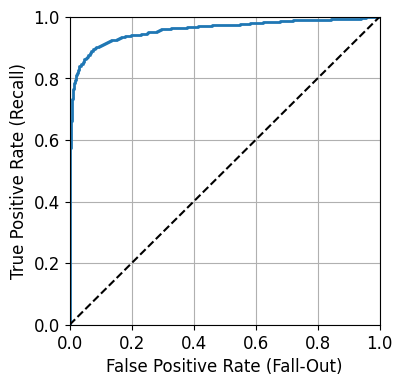

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)

plt.figure(figsize=(4, 4))
plot_roc_curve(fpr, tpr)

Der hier berechnete Wert ist praktisch das Integral der Kurve bzw. die Fläche unterhalb der Kurve. Eine Fläsche von exakt 1 würde ein perfektes Modell bedeuten.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_2, y_scores)

0.9576237950645355

### Classification Report

**Selbst erstellt - Text noch auszuformulieren oder ggf. weglassen**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train_2, y_train_pred))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      7178
        True       0.83      0.80      0.81       822

    accuracy                           0.96      8000
   macro avg       0.90      0.89      0.90      8000
weighted avg       0.96      0.96      0.96      8000



# Aufgabe 1.2

```
2. Extend the provided notebook and apply a Convolutional Neural Network
(CNN) to the same binary classification task. There are many
online tutorials for the Mnist dataset with CNNs - pick any of those and
adapt them to your groups data set and the binary classification task.
Experiment a bit with some of the hyper-parameters of the used model,
explain what your model does (indicate how CNNs work, no details are
necessary but feel free to add them) and what hyper-parameters you
have picked.
```

# CNN (Convolutional Neural Networks)

Convolutional Neural Networks (CNN) stellen eine spezielle Art von neuronalen Netzwerken da. Diese sind sind insbesondere auf die Verarbeitung von Bildern und Videos ausgelegt, weshalb sie insbesondere auch für die Analyse des MNIST Datensatzes hervorragend geeignet sind.

CNNs bestehen aus mehreren Schichten, wobei jede Schicht eine spezifische Aufgabe hat. Dies sind insbesondere (aber nicht beschränkt hierauf):
*   Convolutional Layer (Faltungsschicht): Hier werden die Merkmale der Bilder extrahiert. Merkmale bedeuten in diesem Fall Kanten, Ecken, Texturen oder ähnliches.
*   Pooling Layer (Pooling Schicht). Diese dient der Reduktion der Dimensionen des Datensatzes was inbesondere hilft die Berechnungen zu beschleunigen bzw. effizienter zu gestalten. Gleichzeitig sollen hier die wichtigsten Merkmale behalten werden.
*   Fully Connected Layer (vollständig verbundene Schicht). Diese entspricht einem 'herkömmlichen' neuronalen Netzwerk und dient dafür die Ausgabe der vorherigen Netze zu interpretieren und schließlich eine endgültige Entscheidung zu treffen. In unserem Fall bspw. ob das Bild der Ziffer "2" entspricht.

Der Vorteil der CNNs ist hier inbesondere dieser, dass sie keine manuellen Extraktionstechniken benötigen, da sie in der Lage sind die relevanten Merkmale direkt aus den Rohbildern zu lernen. Dabei sind diese nicht nur auf die reine Bilderkennung per se limitiert sondern können auch für andere Aufgaben verwendet werden wie zum Beispiel die Objektdetektion. Durch die Techniken wie die Reduktion der Dimensionalität kann dies auch recht effizient stattfinden.


## Vorbereitende Tätigkeiten

Zuerst laden wir die benötigten Pakete bzw. Libraries.
Wir fokussieren uns hierbei auf Tensorflow, da dieses Paket auf neuronale Netze bzw. Machine Learning im Allgemeinen spezialisiert ist.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout

from matplotlib import pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

import numpy as np
from numpy import mean
from numpy import std

## Laden des Datensatzes

An dieser Stelle laden wir den Trainings- und Testdatensatz.

In [ ]:
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # filter out only the '2' class
    train_filter = (trainY == 2) | (trainY != 2)
    test_filter = (testY == 2) | (testY != 2)
    trainX, trainY = trainX[train_filter], trainY[train_filter]
    testX, testY = testX[test_filter], testY[test_filter]
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # convert class vectors to binary class matrices
    trainY = np.where(trainY == 2, 1, 0)
    testY = np.where(testY == 2, 1, 0)
    trainY = to_categorical(trainY, 2)
    testY = to_categorical(testY, 2)
    return trainX, trainY, testX, testY

## Vorbereiten des Datensatzes



Der von uns heruntergeladene Datensatz ist noch nicht dafür geeignet in ein CNN geladen zu werden. Was wir wissen, ist, dass die Bilder unseres Datensatzes für jeden Pixel den Wert eines unsigned Integers annehmen können. Dies entspricht den Werten von 0-255 bzw. schwarz und weiß.   
Uns ist zwar nicht bekannt, wie man die Daten idealerweise für eine höchstmögliche Performance transformieren muss - dafür müsste man vermutlich auch sehr viel Literatur recherchieren.
Was wir aber wissen, ist, dass wir uns deutlich leichter tun, wenn wir die Bilder in ein Graustufen-Format umwandeln, also in einen Bereich von 0-1 statt 0-255 abändern.
Hierfür ändern wir den Datentyp erstmal in ein float (bzw. Gleitkommazahl) und dividieren anschließen die Pixel Werte durch deren Maximum.

In [ ]:
def prep_pixels(train, test):
 # convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 # normalize to range 0-1
 train_norm = train_norm / 255.0
 test_norm = test_norm / 255.0
 # return normalized images
 return train_norm, test_norm

## Definition des Models

Unser Modell ist hier dreistufig. Wir haben als erste Stufe einmal einen Layer, welcher die Features extrahiert (Kanten, Ecken etc.), dann kommt es zu einer Datenreduktion durch den sogenannten Pooling Layer und anschließend zu einem normalen neuronalen Netzwerk, welches wir für die Vorhersage bzw. Klassifizierung der Zahl verwenden.

Die Zeile 'model = Sequential()' bedeutet nichts anderes, als eine lineare Abfolge von Schichten bzw. Layern.  
Conv2D(32,(3,3) steht für einen einfachen Convolutional Layer mit einem kleinen Filter von 3x3 Pixeln, wobei dieser bis zu 32 Features detektieren kann.

Als Aktivierungsfunktion verwenden wir hier relu. Dieses steht für "Rectified Linear Unit" und setzt alle negativen Werte auf Null. Positive Werte werden hierbei allerdings nicht verändert.

Der Bereich kernel_initializer='he_uniform' ist die Initialisierungsfunktion für die gesetzten Gewichte für die Filter. 'He uniform' ist dabei eine Methode die besonders gut mit der Rectified Linear Unit zusammenarbeitet und dabei das Training stabilisiert und beschleunigt.

Der letzte Wert 'input_shape=(28,28,1) bedeutet nichts anderes wie, dass die Bilder eine Größe von 28x28 Pixeln besitzen und nur einen Farbkanal besitzen. Dies ist nur für die erste Schicht wichtig, da anschließend die Daten eh vereinfacht werden für die weitere Analyse.

Die zweite Schicht 'MaxPooling2D(2,2) reduziert die Dimensionen der Feature Map um die Hälfte, in dem es den maximalen Wert in jedem 2x2 Fenster nimmt.

Es erfolgen nochmal drei weitere Schichten, welche das Modell nochmal etwas genauer machen sollen. Auch hier werden die Features wieder extrahiert und später gepoolt zur Daten-Reduktion.

Anschließend wird die Feature Map über Flatten() in einen Vektor umgewandelt, welcher diesen anschließend an das 'normale' fully-connected neuronale Netzwerk weitergibt.

Der 'fully-connected-layer' besteht aus 100 Neuronen und dient der Interpretation der extrahierten Features.

Anschließend folgt ein einfacher 2-Neuronen-Layer, welcher einfach nur ausgeben soll, ob es sich bei der Ziffer um eine zwei handelt oder nicht.

Die Aktivierungsfunktion "activation=softmax" gibt uns zusätzlich Wahrscheinlichkeitwerte für die Klassifikation zurück.

Wir initialisieren anschließend den "Optimizer" opt = SGD(learning_rate=0.01, momentum=0.9) mit einer learning_rate von 0.01 und einem Momentum von 0.9. Dies soll inbesondere auch helfen, aus lokalen Minima herauszukommen. Ein direkter Vergleich mit dem SGD Classifier ist hier übrigens nicht möglich, dieser wurde initialisiert mit dem Wert learning_rate="optimal"

Anschließend erfolgt eine Kompilierung des Modells.




In [ ]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(2, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Evaluierung des Modells

Für die Evaluierung verwenden wir hier eine "5-Cross-Validation" - das ist in unserem Fall zweimal häufiger als im SGD-Classifier. Sollte aber keinen wirklichen Einfluss nehmen, außer, dass wir mehr Einsicht in die Performance erhalten und das Modell etwas länger zum durchrechnen benötigt.

Der Trainingsdatensatz sowie auch die Samples werden vor jeder Aufteilung gemischt. Wir trainieren anschließend das Modell für 10 Epochen mit einer Standard-Batch-Größe von 32 Beispielen. Der Testdatensatz wird dabei während und nach jedem Durchlauf bewertet. Dadurch können wir anschließend die Lernkurve erstellen und visualisieren. Weiterhin ist es uns möglich daran zu einem gewissen Grad zu erkennen, ob wir in eine Art Overfitting "schlittern".

Hierbei werden die Daten in einer Variable 'history' gespeichert, welche nachfolgend beim Plotten verwendet wird für die Liniendiagramme.

In [ ]:
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    precisions, recalls, f1s, aucs = list(), list(), list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=42)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model()
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # predict probabilities
        yhat_probs = model.predict(testX, verbose=0)
        # predict class labels
        yhat_classes = np.argmax(yhat_probs, axis=1)
        # true class labels
        testY_classes = np.argmax(testY, axis=1)
        # calculate precision, recall, f1 score
        precision = precision_score(testY_classes, yhat_classes)
        recall = recall_score(testY_classes, yhat_classes)
        f1 = f1_score(testY_classes, yhat_classes)
        auc = roc_auc_score(testY, yhat_probs)
        # store scores
        scores.append(acc)
        histories.append(history)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        aucs.append(auc)
    return scores, histories, precisions, recalls, f1s, aucs

## Plot der Lernkurven

Hier werden zwei Plots erstellt. Einmal für die Verlustfunktion und einmal für die Accuracy. Wobei die blaue Linie die Performance beim Trainings-Datensatz darstellt und die orangene Linie die des Test-Datensatzes.

In [ ]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		plt.subplot(2, 1, 1)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		plt.subplot(2, 1, 2)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

## Evaluierung der Performance

Hier wird die Accuracy nochmal als Boxplot dargestellt.

In [ ]:
def summarize_performance(scores, precisions, recalls, f1s, aucs):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    print('Precision: mean=%.3f std=%.3f, n=%d' % (mean(precisions)*100, std(precisions)*100, len(precisions)))
    print('Recall: mean=%.3f std=%.3f, n=%d' % (mean(recalls)*100, std(recalls)*100, len(recalls)))
    print('F1 Score: mean=%.3f std=%.3f, n=%d' % (mean(f1s)*100, std(f1s)*100, len(f1s)))
    print('AUC Score: mean=%.3f std=%.3f, n=%d' % (mean(aucs)*100, std(aucs)*100, len(aucs)))
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

## Testlauf

Hier findet nichts anderes statt, als dass die Funktionen, welche oben definiert wurden, sukzessive aufgerufen werden.

11490434/11490434 [==============================] - 0s 0us/step
> 99.817
> 99.733
> 99.817
> 99.792
> 99.775


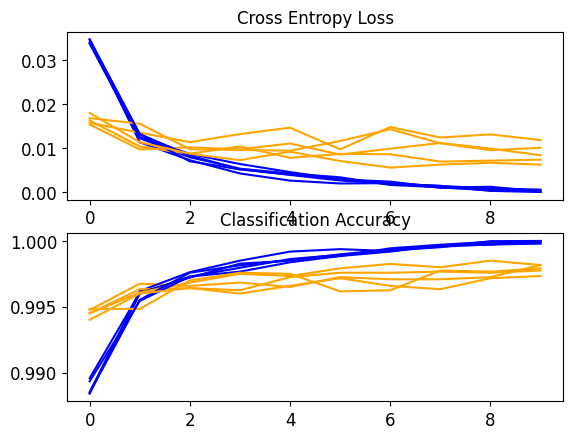

Accuracy: mean=99.787 std=0.031, n=5
Precision: mean=99.140 std=0.244, n=5
Recall: mean=98.703 std=0.265, n=5
F1 Score: mean=98.921 std=0.176, n=5
AUC Score: mean=99.983 std=0.013, n=5


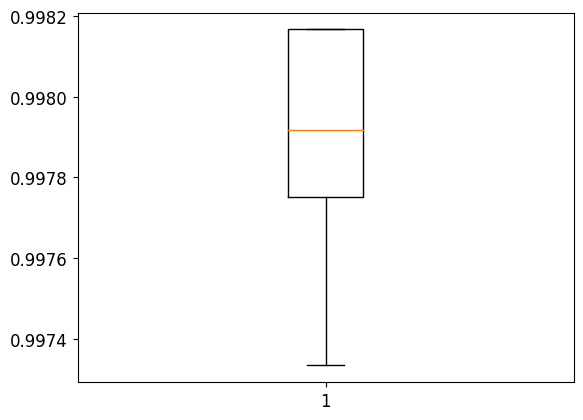

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories, precisions, recalls, f1s, aucs = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores, precisions, recalls, f1s, aucs)

# entry point, run the test harness
run_test_harness()

## Evaluierung der Ergebnisse des CNN

Das Modell performt sehr gut. Die Liniendiagramme geben kaum Hinweise auf ein Overfitting. Die Linien des Testdatensatzes (orange) schlagen nur minimal aus. Insbesondere, wenn man die Skala hierbei noch beachtet.

Die Mittelwerte der Durchläufe sehen ebenfalls sehr gut aus:
```
Accuracy: mean=99.783 std=0.046, n=5
Precision: mean=98.943 std=0.216, n=5
Recall: mean=98.874 std=0.285, n=5
F1 Score: mean=98.909 std=0.224, n=5
AUC Score: mean=99.991 std=0.004, n=5
```
So sagt die Accuracy mit einem Wert von 99.783, dass fast alle Werte korrekt hervorgesagt wurden. Hervorzuheben ist auch die Standardabweichung von 0.049 - was bedeutet, dass die Modelle sehr konsistent waren in ihrer Genauigkeit.

Die Precision gibt hier ein etwas genaueres Bild. Diese verdeutlicht, dass fast alle Bilder, welche als 2 klassifiziert sind auch als solche klassifiziert wurden. Die Standardweichung ist hier etwas höher als bei der Accuracy - aber dennoch in einem guten Bereich. Jedoch lässt sich feststellen, dass die Precision hier über die Modelle deutlich stärker variierte als bei der Accuracy. Bei letzterem dürften auch noch als korrekt "false" klassifizierte mit reinspielen. Eine hohe Precision bedeutet, dass das Modell weniger False Positives erzeugt.

Für Recall gilt im großen und ganzen der Text von Precision. Hier gibt es nur kleinere Unterschiede hinsichtlich der Standardabweichung. Ein hoher Recall bedeutet, das das Modell weniger False Negatives produziert.

Der F1-Score ist das harmonische Mittel von Präzision und Recall. Ein hoher Wert hier bedeutet, dass Recall und Precision ausgeglichen sind bzw. gute Werte besitzen. Dies ist in unserem Modell der Fall.

Der AUC-Score ist die Fläche unterhalb der ROC Kurve. Da wir hier einen Wert von 99.991 haben bedeutet das, dass unser Modell nahezu perfekt funktioniert für unsere Klasse bzw. zwischen "2" und "nicht 2" unterscheiden kann.




# Aufgabe 1.3

```
3. Compare both of your models? Which one is better, which one would
you recommend?
```

# Vergleich des SGD Classifiers mit dem CNN

### Performance (Geschwindigkeitsbezogen)

Auffälig zwischen dem SGDClassifier und der CNN ist vorallem erstmal die Performance. Führt man beides mit einer CPU aus, liegt der SGDClassifier deutlich vorne. Hier hat man innerhalb weniger Sekunden bis Minuten ein Ergebnis während es beim Neuronalen Netzwerk etliche Minuten bis Stunden dauern kann. Hintergrund ist hierbei die hohe Parallelität bei CNNs aufgrund der Menge an Neuronen pro Layer sowie der dazugehörigen Berechnungen. Hat man allerdings Zugriff auf eine (leistungsstarke) GPU vermindert sich dieser Effekt etwas. Zu beachten ist hierbei allerdings zusätzlich, dass das CNN mit dem vollständigen Trainingsdatensatz trainiert wurde (Trainingsdatensatz und Testdatensatz waren getrennt!) und nicht wie der SGD Classifier 'nur' mit einem sechsten der Daten.  
(Dauer gesamt etwa 5 Minuten unter Verwendung der TPU v2)



### Performance (Korrektheit der Klassifizierung)

**SGD Classifier**

```
Accuracy: 89.725
Precision: 82.603
Recall: 80.292
F1-Score: 81.431
AUC Score: 95.762
```

**CNN**

```
Accuracy: mean=99.783 std=0.046, n=5
Precision: mean=98.943 std=0.216, n=5
Recall: mean=98.874 std=0.285, n=5
F1 Score: mean=98.909 std=0.224, n=5
AUC Score: mean=99.991 std=0.004, n=5
```

Das Convolutional Neural Network erzeugte die deutlich besseren Ergebnisse gegenüber dem SGD Classifier. Zwar könnte beim CNN ein Overfitting vorliegen, dafür könnte der SGD Classifier sicherlich noch an der ein oder anderen Stelle optimiert werden um zumindest die 90% Grenze bei der Precision und dem Recall zu 'knacken'.

Hier kann man aufgrund der guten Performance des CNN auch die Geschwindigkeitseinbußen gut verzeihen, da die Ergebnisse wirklich überzeugen.




## Demonstration: Geschwindigkeit bei GPU vs. CPU bei Neuronalen Netzen

*Quelle: https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=Y04m-jvKRDsJ*

Dieser oben genannte Geschwindigkeitsvorteil wird auch in folgendem Code seitens Google verdeutlicht. Hier ist ein Geschwindigkeitsvorteil von bis zu 23x (TPU  vs. CPU) zu sehen. Zu beachten ist hierbei, dass der erste Run einer CNN meist deutlich länger dauert aufgrund von Hintergrund-Initialisierungs-Tätigkeiten.

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.6295164189999696
GPU (s):
0.10322615200004748
GPU speedup over CPU: 35x


## Sonstiges - Check ob mit GPU verbunden

In [ ]:
#Check, ob die Verbindung mit einer GPU besteht,
#da die Dauer der Berechnung des CNN mit einer GPU deutlich (!!) schneller von statten geht.
#CPU - 1 Durchlauf: 8 Minuten
#GPU - ALLE Durchläufe: 5-6 Minuten
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jul  9 18:42:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0              31W /  70W |   2177MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--